## Business Understanding

## Data Understanding

### Inspect Basic Information

In [2]:
import pandas as pd

# Load datasets using your local paths
ratings_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\ratings.csv')
movies_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\movies.csv')
tags_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\tags.csv')
links_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\links.csv')

# Inspect Basic Information
def inspect_basic_info():
    print("Basic Info for Ratings")
    print(ratings_df.head())  # Display the first few rows of the ratings dataset
    print(f"Ratings Data: {ratings_df.shape} rows, {ratings_df.columns.tolist()} columns")  # Number of rows/columns
    
    print("\nBasic Info for Movies")
    print(movies_df.head())  # Display the first few rows of the movies dataset
    print(f"Movies Data: {movies_df.shape} rows, {movies_df.columns.tolist()} columns")
    
    print("\nBasic Info for Tags")
    print(tags_df.head())  # Display the first few rows of the tags dataset
    print(f"Tags Data: {tags_df.shape} rows, {tags_df.columns.tolist()} columns")
    
    print("\nBasic Info for Links")
    print(links_df.head())  # Display the first few rows of the links dataset
    print(f"Links Data: {links_df.shape} rows, {links_df.columns.tolist()} columns")

inspect_basic_info()


Basic Info for Ratings
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Ratings Data: (100836, 4) rows, ['userId', 'movieId', 'rating', 'timestamp'] columns

Basic Info for Movies
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Movies Data: (9742, 3) rows, ['movieId', 'titl

#### Output Interpretation - Inspect Basic Information 


### Ratings Overview

In [3]:
# Ratings Overview
num_users = ratings_df['userId'].nunique()  # Number of unique users
num_movies = ratings_df['movieId'].nunique()  # Number of unique movies rated
ratings_distribution = ratings_df['rating'].value_counts().sort_index()  # Distribution of ratings (1-5 stars)

print(f"\nNumber of unique users: {num_users}")
print(f"Number of unique movies rated: {num_movies}")
print("Ratings distribution:")
print(ratings_distribution)



Number of unique users: 610
Number of unique movies rated: 9724
Ratings distribution:
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64


#### Output Interpretation - Ratings Overview

### Movies Overview

In [4]:
# Movies Overview
num_unique_movies = movies_df['movieId'].nunique()  # Number of unique movies
genres_distribution = movies_df['genres'].value_counts()  # Count of each genre

print(f"\nNumber of unique movies: {num_unique_movies}")
print("Genres distribution (top 10):")
print(genres_distribution.head(10))  # Top 10 most common genres



Number of unique movies: 9742
Genres distribution (top 10):
Drama                   1053
Comedy                   946
Comedy|Drama             435
Comedy|Romance           363
Drama|Romance            349
Documentary              339
Comedy|Drama|Romance     276
Drama|Thriller           168
Horror                   167
Horror|Thriller          135
Name: genres, dtype: int64


#### Output Interpretation - Movies Overview

### Tags Overview

In [5]:
# Tags Overview
num_tags = tags_df.shape[0]  # Total number of tags applied
print(f"\nNumber of tags applied: {num_tags}")



Number of tags applied: 3683


#### Output Interpretation - Tags Overview

### Links Overview

In [6]:
# Links Overview
missing_links = links_df.isnull().sum()  # Count of missing values in the links dataset
print("\nMissing data in Links:")
print(missing_links)



Missing data in Links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


#### Output Interpretation - Links Overview

### Exploring Data Distributions

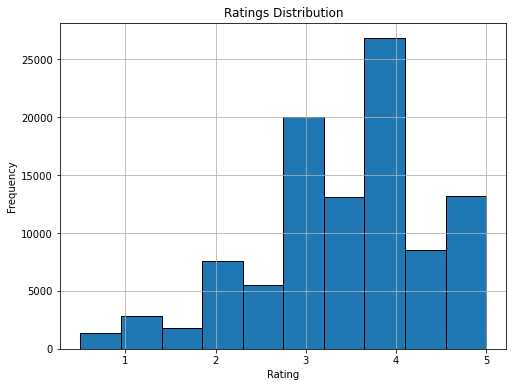


Average number of ratings per user: 165.30491803278687
Average number of ratings per movie: 10.369806663924312


In [7]:
import matplotlib.pyplot as plt

# Ratings Distribution Histogram
plt.figure(figsize=(8,6))
ratings_df['rating'].hist(bins=10, edgecolor='black')  # Plot a histogram of ratings
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average number of ratings per user
user_activity = ratings_df.groupby('userId')['rating'].count()  # Count of ratings per user
print(f"\nAverage number of ratings per user: {user_activity.mean()}")

# Average number of ratings per movie
movie_popularity = ratings_df.groupby('movieId')['rating'].count()  # Count of ratings per movie
print(f"Average number of ratings per movie: {movie_popularity.mean()}")


#### Output Interpretation - Data Distributions 

### Check for Missing Data and Duplicates

In [8]:
# Check for Missing Data and Duplicates
def check_missing_and_duplicates():
    print("\nMissing Values:")
    print("Ratings missing values:\n", ratings_df.isnull().sum())  # Check missing values in ratings dataset
    print("Movies missing values:\n", movies_df.isnull().sum())  # Check missing values in movies dataset
    print("Tags missing values:\n", tags_df.isnull().sum())  # Check missing values in tags dataset
    print("Links missing values:\n", links_df.isnull().sum())  # Check missing values in links dataset

    print("\nDuplicate Values:")
    print("Ratings duplicates:", ratings_df.duplicated().sum())  # Check duplicates in ratings dataset
    print("Movies duplicates:", movies_df.duplicated().sum())  # Check duplicates in movies dataset
    print("Tags duplicates:", tags_df.duplicated().sum())  # Check duplicates in tags dataset
    print("Links duplicates:", links_df.duplicated().sum())  # Check duplicates in links dataset

check_missing_and_duplicates()



Missing Values:
Ratings missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Movies missing values:
 movieId    0
title      0
genres     0
dtype: int64
Tags missing values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Links missing values:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64

Duplicate Values:
Ratings duplicates: 0
Movies duplicates: 0
Tags duplicates: 0
Links duplicates: 0


#### Output Interpretation - Missing Data and Duplicates

### Time-Based Exploration

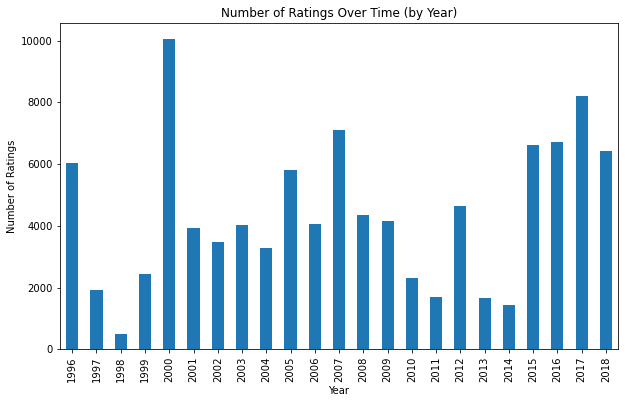

In [9]:
# Convert timestamp and analyze activity over time
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')  # Convert timestamp to datetime
ratings_df['year'] = ratings_df['timestamp'].dt.year  # Extract year from timestamp

plt.figure(figsize=(10,6))
ratings_df['year'].value_counts().sort_index().plot(kind='bar')  # Plot a bar chart of ratings by year
plt.title('Number of Ratings Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


#### Output Interpretation - Time-based Exploration

### Descriptive Statistics

In [10]:
# Descriptive Statistics for Ratings
print("\nDescriptive Statistics for Ratings:")
print(ratings_df['rating'].describe())  # Generate basic statistics like mean, min, max for ratings



Descriptive Statistics for Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


#### Output Interpretation - Descriptive Statistics

### Data Relationships

In [11]:
# Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')  # Create user-item matrix
print("\nUser-item matrix shape:", user_item_matrix.shape)


User-item matrix shape: (610, 9724)


#### Output Interpretation - Data Relationships

## Data Preparation

### Handling Missing Data

# Modeling 

# Evaluation

# Deployment